In [1]:

import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from EVO import DeepNeuralNetwork, EvolutionOptimizer, LogisticRegression

device = torch.device("cuda" if torch.cuda.is_available()
                      else ("mps" if torch.backends.mps.is_available() else "cpu"))

transform = transforms.Compose([
    transforms.ToTensor(),                        # (1, 28, 28) in [0,1]
    transforms.Normalize((0.1307,), (0.3081,)),   # standard MNIST normalisation
    transforms.Lambda(lambda x: x.view(-1))       # flatten to (784,)
])



train_ds = Subset(
    datasets.MNIST(".", train=True, download=True, transform=transform),
    range(5000)
)
test_ds = Subset(
    datasets.MNIST(".", train=False, download=True, transform=transform),
    range(5000)
)

train_loader = DataLoader(
    train_ds, batch_size=256, shuffle=True,
    num_workers=4, pin_memory=True
)
test_loader = DataLoader(
    test_ds, batch_size=1000,
    num_workers=2, pin_memory=True
)

In [11]:
# Notebook Cell 2 — model setup & evolution loop

from EVO import DeepNeuralNetwork, EvolutionOptimizer

model = DeepNeuralNetwork([784, 32, 10], device=device)
model.use_diversity_loss = True
model.diversity_coeff   = 0.2

optimizer = EvolutionOptimizer(model)
optimizer.set_population_size(200)
optimizer.use_backprop = False
optimizer.set_survivors_ratio(0.1)
optimizer.set_fitness_ratio(0.5)
optimizer.set_sneaker_prob(0)
optimizer.set_mutation_intensity(0.05)
optimizer.mutation_rate = 0.05


accuracies = []
for gen in range(5000):
    for X, y in train_loader:
        opt.step(X, y)
    # optionally decay diversity over time
    model.diversity_coeff *= 0.9

    # evaluate on test set
    correct = total = 0
    with torch.no_grad():
        for X, y in test_loader:
            preds = model.predict(X.to(device))
            correct += (preds == y.to(device)).sum().item()
            total   += y.size(0)
    acc = 100 * correct / total
    if gen%100 == 0:
        print(f"Gen {gen+1:03d} → Test Acc: {acc:.2f}%")


Gen 001 → Test Acc: 12.76%
Gen 101 → Test Acc: 30.86%
Gen 201 → Test Acc: 31.56%
Gen 301 → Test Acc: 31.50%
Gen 401 → Test Acc: 35.96%
Gen 501 → Test Acc: 38.40%
Gen 601 → Test Acc: 35.24%
Gen 701 → Test Acc: 43.94%
Gen 801 → Test Acc: 46.92%
Gen 901 → Test Acc: 54.18%
Gen 1001 → Test Acc: 61.84%
Gen 1101 → Test Acc: 61.86%
Gen 1201 → Test Acc: 68.98%
Gen 1301 → Test Acc: 71.32%
Gen 1401 → Test Acc: 72.24%
Gen 1501 → Test Acc: 72.62%
Gen 1601 → Test Acc: 74.30%
Gen 1701 → Test Acc: 74.78%
Gen 1801 → Test Acc: 76.16%
Gen 1901 → Test Acc: 76.56%
Gen 2001 → Test Acc: 77.52%
Gen 2101 → Test Acc: 77.58%
Gen 2201 → Test Acc: 78.06%
Gen 2301 → Test Acc: 78.46%
Gen 2401 → Test Acc: 79.54%
Gen 2501 → Test Acc: 79.86%
Gen 2601 → Test Acc: 80.14%
Gen 2701 → Test Acc: 80.72%
Gen 2801 → Test Acc: 80.88%
Gen 2901 → Test Acc: 80.50%
Gen 3001 → Test Acc: 80.84%
Gen 3101 → Test Acc: 81.12%
Gen 3201 → Test Acc: 81.08%
Gen 3301 → Test Acc: 80.64%
Gen 3401 → Test Acc: 80.74%
Gen 3501 → Test Acc: 81.88%
Ge

In [9]:
max(accuracies)

82.84

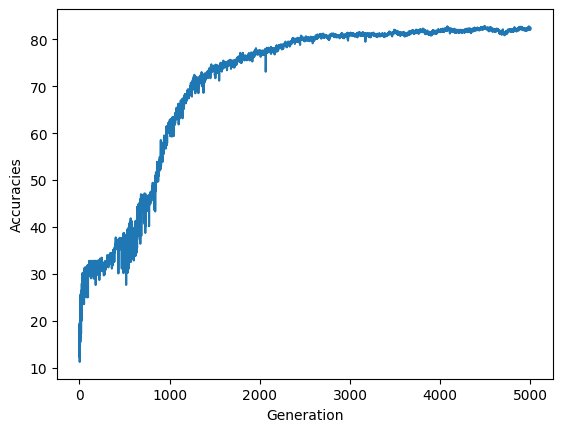

In [12]:
import matplotlib.pyplot as plt
plt.xlabel('Generation')
plt.ylabel('Accuracies')
plt.plot(accuracies)

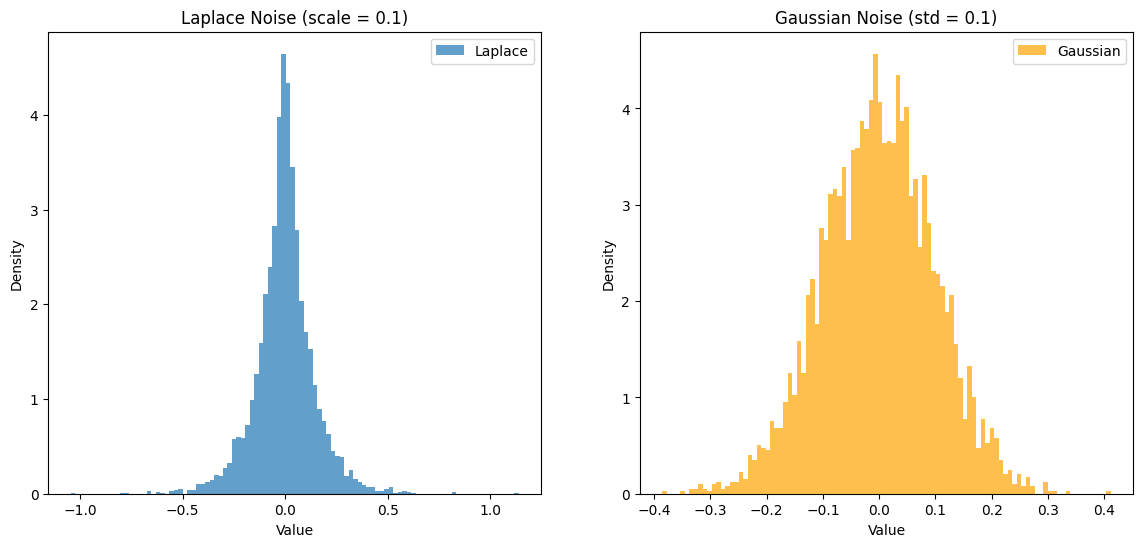

({'mean': -0.002285860013216734,
  'std': 0.1433315873146057,
  'min': -1.046592116355896,
  'max': 1.1399091482162476},
 {'mean': -0.0014646044000983238,
  'std': 0.0992639809846878,
  'min': -0.3852318227291107,
  'max': 0.4116326868534088})

In [9]:
import torch
import matplotlib.pyplot as plt

# Mutation parameters
mutation_intensity = 0.1
sample_size = 5000  # reduced from 10000 to avoid memory issues

# Generate Laplace and Gaussian noise
laplace_noise = torch.distributions.Laplace(loc=0.0, scale=mutation_intensity).sample((sample_size,))
gaussian_noise = torch.normal(mean=0.0, std=mutation_intensity, size=(sample_size,))

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(laplace_noise.numpy(), bins=100, density=True, alpha=0.7, label="Laplace")
plt.title("Laplace Noise (scale = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(gaussian_noise.numpy(), bins=100, density=True, alpha=0.7, color="orange", label="Gaussian")
plt.title("Gaussian Noise (std = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Return basic statistics
laplace_stats = {
    "mean": laplace_noise.mean().item(),
    "std": laplace_noise.std().item(),
    "min": laplace_noise.min().item(),
    "max": laplace_noise.max().item(),
}
gaussian_stats = {
    "mean": gaussian_noise.mean().item(),
    "std": gaussian_noise.std().item(),
    "min": gaussian_noise.min().item(),
    "max": gaussian_noise.max().item(),
}

laplace_stats, gaussian_stats

In [11]:
!git add .

In [12]:
!git commit -m"fixed distributions and modified elitism to be based on CE"

[final-touches 1528a83] fixed distributions and modified elitism to be based on CE
 24 files changed, 1692 insertions(+), 21 deletions(-)
 create mode 100644 .ipynb_checkpoints/EVO-checkpoint.py
 create mode 100644 .ipynb_checkpoints/evolution-checkpoint.txt
 create mode 100644 .ipynb_checkpoints/evolution_error-checkpoint.txt
 create mode 100644 .ipynb_checkpoints/final-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/train_loop-checkpoint.py
 create mode 100644 __pycache__/EVO.cpython-310.pyc
 create mode 100644 checkpoint_gen_10.pt
 create mode 100644 checkpoint_gen_15.pt
 create mode 100644 checkpoint_gen_20.pt
 create mode 100644 checkpoint_gen_25.pt
 create mode 100644 checkpoint_gen_30.pt
 create mode 100644 checkpoint_gen_35.pt
 create mode 100644 checkpoint_gen_40.pt
 create mode 100644 checkpoint_gen_45.pt
 create mode 100644 checkpoint_gen_5.pt
 create mode 100644 checkpoint_gen_50.pt
 create mode 100644 evolution.txt
 create mode 100644 evolution_error.txt
 create mo

In [13]:
!git push

Username for 'https://github.com': ^C


In [ ]:
!nvidia-smi

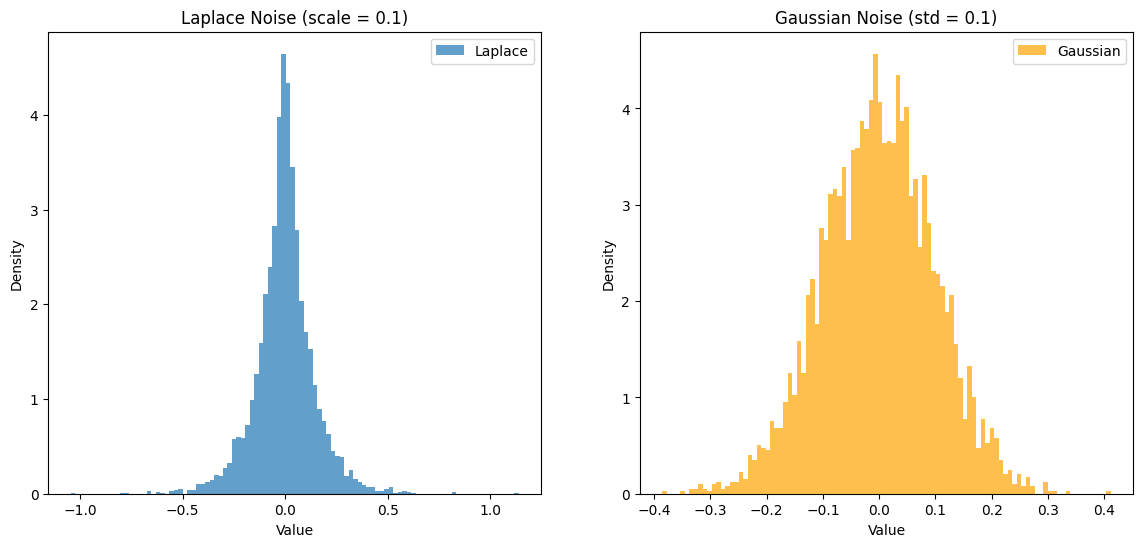

({'mean': -0.002285860013216734,
  'std': 0.1433315873146057,
  'min': -1.046592116355896,
  'max': 1.1399091482162476},
 {'mean': -0.0014646044000983238,
  'std': 0.0992639809846878,
  'min': -0.3852318227291107,
  'max': 0.4116326868534088})

In [9]:
import torch
import matplotlib.pyplot as plt

# Mutation parameters
mutation_intensity = 0.1
sample_size = 5000  # reduced from 10000 to avoid memory issues

# Generate Laplace and Gaussian noise
laplace_noise = torch.distributions.Laplace(loc=0.0, scale=mutation_intensity).sample((sample_size,))
gaussian_noise = torch.normal(mean=0.0, std=mutation_intensity, size=(sample_size,))

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(laplace_noise.numpy(), bins=100, density=True, alpha=0.7, label="Laplace")
plt.title("Laplace Noise (scale = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(gaussian_noise.numpy(), bins=100, density=True, alpha=0.7, color="orange", label="Gaussian")
plt.title("Gaussian Noise (std = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Return basic statistics
laplace_stats = {
    "mean": laplace_noise.mean().item(),
    "std": laplace_noise.std().item(),
    "min": laplace_noise.min().item(),
    "max": laplace_noise.max().item(),
}
gaussian_stats = {
    "mean": gaussian_noise.mean().item(),
    "std": gaussian_noise.std().item(),
    "min": gaussian_noise.min().item(),
    "max": gaussian_noise.max().item(),
}

laplace_stats, gaussian_stats

In [ ]:
!git add .